In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:,.4f}".format

#### Inputs

In [130]:
risk_free_rate = 0.05
volatility = 0.20
face_value = 100
asset_value_1 = 200
asset_value_2 = 95

#### Exercise 01: Asset value (\$V_0$) = 200

In [131]:
maturity = np.arange(start=0.20, stop=10.2, step=0.20)
df = pd.DataFrame(maturity, columns = ['maturity'])
df['d1'] = (np.log(asset_value_1/face_value)+((risk_free_rate+((volatility**2)/2))*df['maturity']))/(volatility*np.sqrt(df['maturity']))
df['d2'] = (np.log(asset_value_1/face_value)+((risk_free_rate-((volatility**2)/2))*df['maturity']))/(volatility*np.sqrt(df['maturity']))
df['default_spread'] = (-1/df['maturity'])*np.log(stats.norm.cdf(df['d2'])+(asset_value_1/(face_value*np.exp(-risk_free_rate*df['maturity'])))*stats.norm.cdf(-df['d1']))

In [132]:
df = df.set_index('maturity')

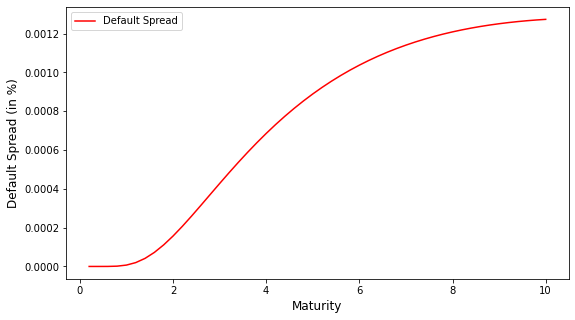

In [133]:
a = df['default_spread'].values

# Plot the beta distribution
plt.figure(figsize=(9,5))
plt.plot(df.index, a, color = 'red', label = 'Default Spread', linestyle = '-')
plt.xlabel('Maturity', fontsize=12)
plt.ylabel('Default Spread (in %)', fontsize=12)
plt.legend()
plt.savefig('default_spread_200.png', dpi = 100)
plt.show()

#### Exercise 02: Asset value (\$V_0$) = 95

In [126]:
maturity = np.arange(start=0.20, stop=10.2, step=0.20)
df = pd.DataFrame(maturity, columns = ['maturity'])
df['d1'] = (np.log(asset_value_2/face_value)+((risk_free_rate+((volatility**2)/2))*df['maturity']))/(volatility*np.sqrt(df['maturity']))
df['d2'] = (np.log(asset_value_2/face_value)+((risk_free_rate-((volatility**2)/2))*df['maturity']))/(volatility*np.sqrt(df['maturity']))
df['default_spread'] = (-1/df['maturity'])*np.log(stats.norm.cdf(df['d2'])+(asset_value_2/(face_value*np.exp(-risk_free_rate*df['maturity'])))*stats.norm.cdf(-df['d1']))

In [127]:
df = df.set_index('maturity')

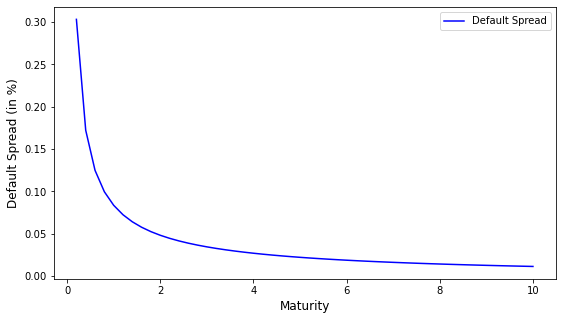

In [128]:
a = df['default_spread'].values

# Plot the beta distribution
plt.figure(figsize=(9,5))
plt.plot(df.index, a, color = 'blue', label = 'Default Spread', linestyle = '-')
plt.xlabel('Maturity', fontsize=12)
plt.ylabel('Default Spread (in %)', fontsize=12)
plt.legend()
plt.savefig('default_spread_95.png', dpi = 100)
plt.show()